# Pre procesamiento de los datos
Modificado en Oct 21, 2020

Modificado en Abril 30, 2021

Los datos han sido extraídos del repositorio oficial de [Airbnb](http://insideairbnb.com/get-the-data.html). Este script ulitiza la actualización de Abril 7 del 2021 para la ciudad de New York

In [294]:
import pandas as pd
import numpy as np
import re
pd.options.display.max_columns = None
pd.options.display.max_rows= None

In [295]:
listings=pd.read_csv('listings.csv')

print(f'El dataset de entrada contiene {listings.shape[0]} filas y {listings.shape[1]} columnas')

El dataset de entrada contiene 36905 filas y 74 columnas


In [296]:
listings.tail(2)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
36903,49091581,https://www.airbnb.com/rooms/49091581,20210407173759,2021-04-09,Furnished Bright Apartment in Hell's Kitchen,1 bedroom apartment in Hell's Kitchen.<br />Mo...,NaN,https://a0.muscache.com/pictures/8f730543-a68b...,305240193,https://www.airbnb.com/users/show/305240193,June,2019-10-29,"New York, New York, United States","At June Homes, our mission is to make renting ...",within a few hours,99%,46%,f,https://a0.muscache.com/im/pictures/user/4adc1...,https://a0.muscache.com/im/pictures/user/4adc1...,Crown Heights,1.0,1.0,"['email', 'phone', 'jumio', 'offline_governmen...",t,t,NaN,Hell's Kitchen,Manhattan,40.76456,-73.98573,Entire apartment,Entire home/apt,1,NaN,1 bath,1.0,1.0,"[""Refrigerator"", ""Essentials"", ""Long term stay...",$123.00,30,180,30.0,30.0,180.0,180.0,30.0,180.0,NaN,t,0,7,37,312,2021-04-09,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,241,42,199,0,NaN
36904,49092532,https://www.airbnb.com/rooms/49092532,20210407173759,2021-04-09,Panoramic city views! 2/3 bdrms private terra...,You’ll be right in the heart of everything at ...,Best neighborhood in NYC !! You have easy walk...,https://a0.muscache.com/pictures/a060b725-ee2d...,154949847,https://www.airbnb.com/users/show/154949847,Emily,2017-10-17,"West New York, New Jersey, United States",We are Emily and Robin and we started travelin...,within a few hours,97%,16%,f,https://a0.muscache.com/im/pictures/user/8a057...,https://a0.muscache.com/im/pictures/user/8a057...,Williamsburg,18.0,18.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"New York, United States",Hell's Kitchen,Manhattan,40.77034,-73.99305,Entire apartment,Entire home/apt,6,NaN,2 baths,2.0,3.0,"[""Essentials"", ""Dryer"", ""Long term stays allow...",$299.00,30,85,30.0,30.0,85.0,85.0,30.0,85.0,NaN,t,0,25,55,175,2021-04-09,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,10,10,0,0,NaN


En las columnas se incluye información relacionada con:
* Descripción
* Arrendatario
* Geolocalización
* Caracteristicas del espacio
* Precio
* Valores adicionales
* Calificación
* Licencias

In [297]:
listings.columns.to_list()

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'description',
 'neighborhood_overview',
 'picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'calendar_updated',
 'has_availability',
 'availability_30',
 'availa

#### 1. Columnas de valor único

In [298]:
for col in listings.columns: ##Eliminando las columnas que tienen un solo valor 
    if len(listings[col].unique()) == 1:
        listings.drop(col,inplace=True,axis=1)
        
print(f'Luego de remover las columnas con un valor único, permanecen {len(listings.columns)} columnas')

Luego de remover las columnas con un valor único, permanecen 70 columnas


#### 2. Convirtiendo strings en floats

In [299]:
def removing_percentage (dataset, column): #Eliminando % del string y convirtiendolo en número
    dataset[column]=dataset[column].str.replace('%', '').astype('float')
    print(f'La columna  {column} ha sido modificada de string a float')

removing_perc=['host_acceptance_rate', 'host_response_rate']

for var in removing_perc:
    removing_percentage(listings, var)

La columna  host_acceptance_rate ha sido modificada de string a float
La columna  host_response_rate ha sido modificada de string a float


#### 3. Datos faltantes

In [300]:
is_na=listings.isna().sum().sort_values(ascending=False)
np.round(100*is_na/len(np.unique(listings['id'])),2)

host_response_time                              49.43
host_response_rate                              49.43
host_acceptance_rate                            45.31
host_about                                      42.44
neighborhood_overview                           37.44
neighbourhood                                   37.44
review_scores_value                             28.30
review_scores_location                          28.30
review_scores_checkin                           28.30
review_scores_accuracy                          28.27
review_scores_communication                     28.26
review_scores_cleanliness                       28.24
review_scores_rating                            28.20
first_review                                    26.34
reviews_per_month                               26.34
last_review                                     26.34
host_neighbourhood                              20.66
bedrooms                                         9.96
host_location               

In [301]:
listings.bedrooms=listings.bedrooms.fillna(np.mean(listings.bedrooms.dropna())) #Completando datos faltantes con media
listings.beds=listings.beds.fillna(np.mean(listings.beds.dropna())) 

Se identifican y almacenan las columnas con un porcentaje superior a 25% de datos faltantes, para ser eliminadas posteriormente.

In [302]:
most_missing_cols = listings.columns[listings.isnull().sum()/len(listings) > 0.25]
most_missing_cols =most_missing_cols.to_list() #Columnas con un porcentaje de datos faltantes superior al 25%

In [303]:
most_missing_cols

['neighborhood_overview',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'neighbourhood',
 'first_review',
 'last_review',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month']

In [304]:
listings.shape

(36905, 70)

#### 4. Agrupando 'Property_type' y 'Bed_type

In [305]:
listings.pivot_table(index='property_type', values='id', aggfunc='count').sort_values(by='id', ascending=False)

,id
property_type,
Entire apartment,15329
Private room in apartment,12045
Private room in house,1892
Private room in townhouse,1081
Entire house,974
Entire condominium,969
Entire loft,617
Entire townhouse,598
Shared room in apartment,516


In [306]:
listings.loc[listings.property_type.str.contains('oom'), 'property_type']='Room'
listings.loc[listings.property_type.str.contains('ap'), 'property_type']='Apartment'
listings.loc[listings.property_type.str.contains('house'), 'property_type']='House'
listings.loc[listings.property_type.str.contains('Casa'), 'property_type']='House'
listings.loc[~listings['property_type'].isin(['Room', 'Apartment', 'House']),'property_type']='Other'

In [307]:
pivot0=listings.pivot_table(index='property_type', values='id', aggfunc='count').sort_values(by='id', ascending=True)
pivot0['percentage']= np.round(100* (pivot0['id']/pivot0['id'].sum()),1)
pivot0=pivot0.reset_index()
pivot0

,property_type,id,percentage
0,House,1632,4.4
1,Other,1950,5.3
2,Apartment,15622,42.3
3,Room,17701,48.0


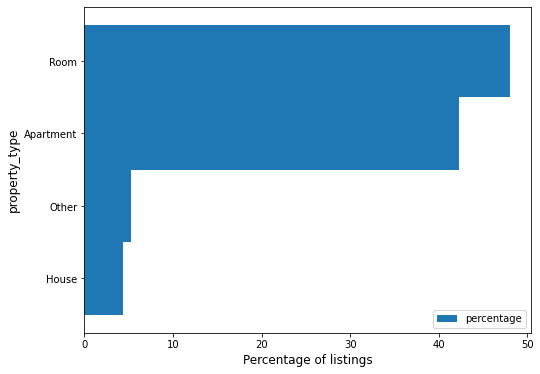

In [308]:
feq = pivot0[['property_type', 'percentage']].sort_values('percentage')
feq=feq.set_index('property_type')
feq.plot.barh(figsize=(8,6),  width= 1)
plt.xlabel('Percentage of listings', fontsize = 12)
plt.ylabel('property_type', fontsize = 12)
plt.show()

In [309]:
r=listings.pivot_table(index='room_type', values='id', aggfunc='count', margins=True).sort_values(by='id', ascending=True)
r.columns=['Total']
r

,Total
room_type,
Hotel room,282
Shared room,671
Private room,16709
Entire home/apt,19243
All,36905


In [310]:
listings['room_type']=listings['room_type'].replace('Hotel room', 'Private room') 

#### 5. Columnas a eliminar dada la naturaleza de sus datos

In [311]:
url_field=list(listings.filter(like='url').columns) 
other_pricing_field=list(listings.filter(like='_price').columns)
text_field=['name','neighborhood_overview', 'host_about','description']
other_geo=[  'neighbourhood',  'neighbourhood_cleansed',  'neighbourhood_group_cleansed']
host=['host_id', 'host_name', 'host_since','host_location','host_about','host_neighbourhood',
      'calculated_host_listings_count_private_rooms' ,'host_total_listings_count',
      'calculated_host_listings_count_entire_homes','host_verifications', 'calculated_host_listings_count_shared_rooms']
dates=['last_scraped', 'host_since', 'calendar_last_scraped']
nights=['minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm']
reviews=['number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review']

In [312]:
listings=listings.drop(most_missing_cols +url_field+other_pricing_field+text_field+other_geo+host+dates+nights+reviews, axis=1)

In [313]:
listings.head(3)

,id,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,instant_bookable,calculated_host_listings_count
0,2595,f,6.0,t,t,40.75356,-73.98559,Apartment,Entire home/apt,2,1 bath,1.318137,1.0,"[""Refrigerator"", ""Essentials"", ""Cleaning befor...",$150.00,30,1125,t,30,60,90,365,48,f,3
1,3831,f,1.0,t,t,40.68494,-73.95765,Other,Entire home/apt,3,1 bath,1.000000,3.0,"[""Bathtub"", ""Smoke alarm"", ""Dishes and silverw...",$76.00,1,730,t,1,12,26,198,396,f,1
2,5121,f,1.0,t,t,40.68535,-73.95512,Room,Private room,2,NaN,1.000000,1.0,"[""Kitchen"", ""Heating"", ""Wifi"", ""Long term stay...",$60.00,30,730,t,30,60,90,365,50,f,1


#### 6. Reemplazando f, t por 0,1

In [314]:
listings.replace({'f': 0, 't': 1}, inplace=True)

#### 7. Bathrooms

In [315]:
listings['bathrooms_text'].value_counts()

1 bath               19005
1 shared bath         9377
2 baths               2153
1 private bath        2134
2 shared baths        1097
1.5 baths             1054
1.5 shared baths       737
2.5 baths              292
3 baths                224
0 shared baths         173
3 shared baths         111
2.5 shared baths        89
3.5 baths               66
4 baths                 54
4 shared baths          44
0 baths                 38
Half-bath               34
Shared half-bath        20
4.5 baths               19
Private half-bath       16
5 baths                 10
6 baths                  7
6 shared baths           7
5.5 baths                5
8 baths                  4
4.5 shared baths         3
3.5 shared baths         3
6.5 shared baths         3
7.5 baths                3
5 shared baths           2
7 baths                  2
15.5 baths               1
7 shared baths           1
5.5 shared baths         1
9.5 baths                1
6.5 baths                1
Name: bathrooms_text, dtype:

In [316]:
listings['bathroom_type']=0
listings.bathrooms_text=listings.bathrooms_text.fillna('No data')
listings.loc[listings.bathrooms_text.str.contains('shared'), 'bathroom_type']='Shared'
listings.loc[~listings.bathrooms_text.str.contains('shared'), 'bathroom_type']='Private' #No compartido igual a privado
listings.pivot_table(index='bathroom_type', values='id', aggfunc='count', margins=True)

,id
bathroom_type,
Private,25257
Shared,11648
All,36905


In [326]:
listings['bathrooms_text'].head(5)

0       1 bath
1       1 bath
2      No data
3    1.5 baths
4       1 bath
Name: bathrooms_text, dtype: object

In [318]:
listings['t_bathrooms']=listings['bathrooms_text'].str.extract('(^\d*[.,]?\d)', expand=True)
listings['t_bathrooms']=listings['t_bathrooms'].fillna(0.5)

In [319]:
import matplotlib.pyplot as plt
p=listings.pivot_table(index='t_bathrooms', values='id', aggfunc='count').reset_index()
p['t_bathrooms']=p['t_bathrooms'].astype(float)
p=p.sort_values(by='t_bathrooms')
p

,t_bathrooms,id
1,0.0,211
0,0.5,184
2,1.0,30516
3,1.5,1791
5,2.0,3250
6,2.5,381
7,3.0,335
8,3.5,69
9,4.0,98
10,4.5,22


In [320]:
listings.amenities.tail()

36900    ["Kitchen", "Security cameras on property", "T...
36901    ["Refrigerator", "Essentials", "Long term stay...
36902    ["Kitchen", "Refrigerator", "TV", "Hot water",...
36903    ["Refrigerator", "Essentials", "Long term stay...
36904    ["Essentials", "Dryer", "Long term stays allow...
Name: amenities, dtype: object

In [321]:
anemities_t=set(listings.amenities)
i=0
nuevas=[]
for item in anemities_t:
    nuevas.append(item.split(','))

In [322]:
f_amenities=[]
for sub_lista in nuevas:
    for amenity in sub_lista:
        if amenity in f_amenities:
            continue
        else: f_amenities.append(amenity)

In [323]:
for element in range(len(f_amenities)):
    f_amenities[element]=f_amenities[element].replace('["','')
    f_amenities[element]=f_amenities[element].replace('"]','')
    f_amenities[element]=f_amenities[element].replace('"','')
    f_amenities[element]=f_amenities[element].replace(' ','')

In [324]:
len(f_amenities)

1216

In [325]:
amenity_list=list(dict.fromkeys(f_amenities))
print(len(amenity_list))

960


In [327]:
amenity_list[0]

'Kitchen'

#### 8. Generando dummies de variables categóricas

In [177]:
for sub_lista in lista:
    for amenity in sub_lista:
        if amenity in unique_amenities:
            continue
        else: unique_amenities.append(amenity)

In [27]:
listings=pd.concat([listings, pd.get_dummies(listings['property_type'])], axis=1) 
listings=pd.concat([listings, pd.get_dummies(listings['room_type'])], axis=1) 
listings=pd.concat([listings, pd.get_dummies(listings['bathroom_type'])], axis=1) 

var_categorical=['property_type', 'room_type', 'bathroom_type' ]
listings=listings.drop(var_categorical, axis=1)

#### 9. Removiendo datos faltantes

In [28]:
listings_final=listings.dropna()
percentage=listings_final.shape[0]/listings.shape[0]
print(f'Luego del preprocesamiento, permanece un {percentage:.2f} del conjunto inicial' , ) 

Luego del preprocesamiento, permanece un 0.97 del conjunto inicial


In [29]:
listings_final.shape

(35637, 31)

In [30]:
listings_final.tail(3)

,id,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bathrooms_text,amenities,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,instant_bookable,calculated_host_listings_count,t_bathrooms,Apartment,House,Other,Room,Entire home/apt,Private room,Shared room,Private,Shared
36902,49089765,0.0,0.0,1.0,1.0,40.72511,-73.98222,2,1 bath,"[""Kitchen"", ""Refrigerator"", ""TV"", ""Hot water"",...",145.0,30,1125,1,0,0,25,300,0,0,3,1,1,0,0,0,1,0,0,1,0
36903,49091581,0.0,1.0,1.0,1.0,40.76456,-73.98573,1,1 bath,"[""Refrigerator"", ""Essentials"", ""Long term stay...",123.0,30,180,1,0,7,37,312,0,0,241,1,1,0,0,0,1,0,0,1,0
36904,49092532,0.0,18.0,1.0,1.0,40.77034,-73.99305,6,2 baths,"[""Essentials"", ""Dryer"", ""Long term stays allow...",299.0,30,85,1,0,25,55,175,0,0,10,2,1,0,0,0,1,0,0,1,0


In [31]:
listings_final.shape

(35637, 31)

In [32]:
listings_final.to_csv('Listings_clean.csv')